## Problem Set 06
### AST 8110, Fall 2022
##### Tyler Barna

In [13]:
## Importing packages (some of these may not be useful)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import time
#bigstart = time.time()


import sys
import os
import astropy
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import random

from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from numpy.linalg import norm ## to calculate magnitude of vector

from tqdm import tqdm
from scipy import meshgrid
from scipy.stats import binned_statistic as binstat
from scipy.integrate import quad, dblquad ## to integrate
from scipy.signal import argrelextrema as extrema 

#%matplotlib inline
mpl.rcParams.update({"axes.grid" : False})
plt.style.context(("seaborn-colorblind",))
#plt.rc("text", usetex=True)
#plt.rc("font", family="serif")

## Set Seed
random.seed(8110)

### Problem 1

Take $b=0.07$ and assume sources are evenly spaced at distances of $0.05$ and both $x$ and $y$ go from $0 \rightarrow 1$.

The foreground masses are singular isothermal spheres (SIS) located at

$$
\begin{align}
(0.44,0.44) \\
(0.51,0.51) \\
(0.58,0.58) 
\end{align}
$$

SIS equations are given by
$$
\begin{equation}
\Psi  = b \left[x^2 +y^2\right]^{1/2}
\end{equation}
$$

$$
\begin{equation}
\kappa = \frac{b}{2R}
\end{equation}
$$

$$
\begin{equation}
\gamma_1 = \frac{b \left[y^2 - x^2\right]}{2R^3}
\end{equation}
$$

$$
\begin{equation}
\gamma_2 = \frac{b xy}{R^3}
\end{equation}
$$

For $R= \sqrt{x^2 + y^2}$

In [3]:
## create array of source positions
x = np.arange(0, 1.05, 0.05) ## so we actually have 21 sources
y = np.arange(0, 1.05, 0.05)
xx, yy = np.meshgrid(x, y)

## define the lens locations
lens_xy = np.array([[0.44, 0.44], [0.51,0.51], [0.58,0.58]])

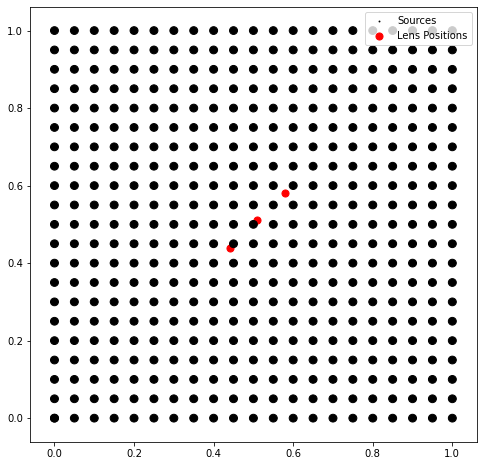

In [17]:
## plot the original source positions
fig, ax = plt.subplots(figsize=(8,8),facecolor="w")
ax.scatter(xx, yy,  color="k",s=0.8, label="Sources");

def plot_sources(x, y):
    circ = plt.Circle((x, y), 0.01, color="k", fill=True)
    ax.add_patch(circ)
    
ps = np.vectorize(plot_sources)
ps(xx,yy)
ax.scatter(lens_xy[:,0], lens_xy[:,1], color="r", s=50, label="Lens Positions");
ax.legend()
plt.show();

### Problem 2

#### (a)

$$
\begin{equation}
n_U (f) = \left( f^{s_1} + f^{s_2} \right)^{-1}
\end{equation}
$$

$$
\begin{equation}
p\left(\mu\right) \text{d}\mu = \frac{1}{sqrt{\pi \sigma_\mu^2}} \text{exp}\left(-\frac{(\mu - \mu_0)^2}{\sigma_\mu^2}\right) \text{d}\mu
\end{equation}
$$

$$
\begin{equation}
n_L (f) = \int \frac{n_U (f/\mu) p(\mu)}{\mu} \text{d}\mu
\end{equation}
$$


#### (b)